#ML4Net - Lab 2

## Team members

Jan Sapé Rivero (266912) | Biel Domingo Grifell (268636) | Francesc Xarrie (266708)

## Description

In this lab, you will implement an ML model that detects congestion in Wi-Fi networks. In particular, you will desing and implement a supervised learning model (e.g., linear regression, multi-layer perceptron, neural network), which you will train using a dataset that was generated using the ns-3 simulator.

Each row in the dataset is organized as (x1, x2, ..., x26, y1, y2, ..., y26, s, r, l), where:

* `x1, x2..., x26, y1, y2, ..., y26` represent the histogram of the Inter-Frame Space (IFS) values for M frames that accessed the medium in a 60 seconds observation sample.
  * `x26` represents the maximum IFS duration (in ms) in the considered M frames whereas `x1` is `x26`/26
  * The remaining `xi` values are buckets at uniform spacing between `x1` and `x26`.
  * For i>1, the values of `yi` represent the IFS histogram count (in percentage) for a corresponding bucket interval between `xi`-1 and `xi`.
  * In the case of `y1`, the bucket interval is between 0 and `x1`
* `s` is the average IFS duration (in ms)
* `r` is the percentage of frame collisions
* `l` is the label, where 1 indicates that the network is saturated, and 0, that it is not

Original dataset: https://ieee-dataport.org/documents/dataset-identification-saturated-and-unsaturated-wi-fi-networks

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   Submission deadline: 25 May 2025 (EoB).

## Setting up the environment

1. Connect your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Download the dataset

In [2]:
!wget https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/dataset_Lab2.zip

--2025-06-01 20:16:46--  https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/dataset_Lab2.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/refs/heads/master/files/dataset_Lab2.zip [following]
--2025-06-01 20:16:47--  https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/refs/heads/master/files/dataset_Lab2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1803279 (1.7M) [application/zip]
Saving to: ‘dataset_Lab2.zip’

dataset_Lab2.zip    100%[===================>]   1.72M  --.-KB/s    in 0.05s   

2025-06-01 20:16:47 (35.3 MB/

3. Define the main path of the code

In [3]:
mypath="drive/MyDrive/AAX/Lab2"

4. Extract the source code to the destination folder

In [4]:
mkdir $mypath; cp dataset_Lab2.zip $mypath; cd $mypath; unzip dataset_Lab2.zip

Archive:  dataset_Lab2.zip
  inflating: test_data.csv           
  inflating: __MACOSX/._test_data.csv  
  inflating: train_data.csv          
  inflating: __MACOSX/._train_data.csv  


## Visualizing the data




       0       1       2       3       4       5       6       7       8   \
0  0.0065  0.0130  0.0195  0.0260  0.0325  0.0390  0.0455  0.0520  0.0585   
1  0.0263  0.0526  0.0789  0.1052  0.1316  0.1579  0.1842  0.2105  0.2368   
2  0.0176  0.0352  0.0528  0.0704  0.0881  0.1057  0.1233  0.1409  0.1585   
3  0.0222  0.0444  0.0666  0.0888  0.1110  0.1332  0.1554  0.1776  0.1998   
4  0.0189  0.0379  0.0568  0.0758  0.0947  0.1137  0.1326  0.1516  0.1705   

       9   ...      45      46      47      48      49      50      51  \
0  0.0650  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
1  0.2631  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
2  0.1761  ...  0.0316  0.0368  0.0312  0.0312  0.0316  0.0299  0.0304   
3  0.2220  ...  0.0316  0.0307  0.0312  0.0000  0.0360  0.0364  0.0304   
4  0.1895  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   

       52      53  54  
0  0.0604  0.9960   1  
1  0.0604  0.9960   1  
2  0.0604  0.9957   

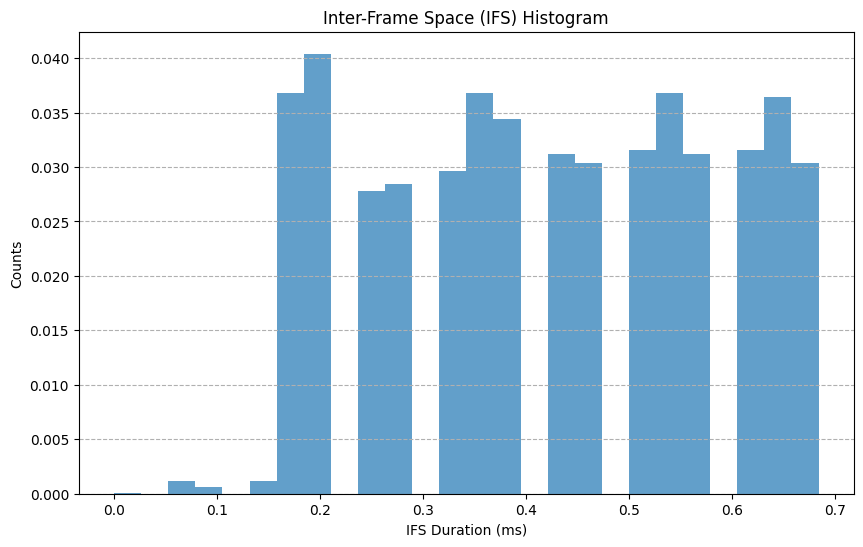

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_ifs_histogram(data_row):
    """
    Plots the Inter-Frame Space (IFS) histogram from a single row of the dataset.

    Args:
        data_row (list or numpy.ndarray): A list or array representing a single row
                                          in the format (x1, ..., x26, y1, ..., y26, s, r, l).
    """

    # Get IFS values and the corresponding counts
    x_values = np.array(data_row[:26])
    y_counts = np.array(data_row[26:52])

    # Calculate the bin edges based on x_values
    bin_edges = [0] + list(x_values)

    # Create the histogram plot
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], y_counts, width=np.diff(bin_edges)[0], align='edge', alpha=0.7)

    # Add labels and title
    plt.xlabel("IFS Duration (ms)")
    plt.ylabel("Counts")
    plt.title("Inter-Frame Space (IFS) Histogram")
    plt.grid(axis='y', linestyle='--')

    # Show the plot
    plt.show()

# Example usage

# -> Read the data file
file_name = mypath + '/train_data.csv'
train_data_df = pd.read_csv(file_name, header=None)
print(train_data_df.head())

# -> Get a sample from the dataset and plot it
row_index = 1
sample_data = train_data_df.iloc[row_index].values
plot_ifs_histogram(sample_data)

## EXERCISES

### Exercise 1:
Define an approach for training and validating the model you are going to train with the proposed data. Then, perform the split accordingly.

To prepare the data for model training and evaluation, we first load the dataset and extract the relevant features, which include the IFS histogram values (x1 to x26, y1 to y26), along with the average IFS duration (s) and the collision percentage (r). Before any training, we reserve 20% of the dataset as a separate test set to evaluate the model’s final performance on unseen data. The remaining 80% is used for training and validation. These features are normalized using standard scaling to ensure consistent input ranges for the learning algorithm. We then apply Stratified K-Fold Cross-Validation with 5 splits on the training portion to maintain the proportion of saturated and non-saturated samples in each fold. This approach allows the model to be trained and validated across different data subsets while preserving class balance, resulting in a more reliable estimate of its performance during development.









In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler

# === Load Full Dataset ===
file_name = mypath + '/train_data.csv'
df = pd.read_csv(file_name, header=None)

# === Step 1: Split off 20% Test Set ===
df_trainval, df_test = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df.iloc[:, 54]
)

# === Step 2: Prepare Features and Labels for Train/Val ===
X = df_trainval.iloc[:, :52].copy()
X[52] = df_trainval.iloc[:, 52]  # s
X[53] = df_trainval.iloc[:, 53]  # r
X.columns = X.columns.astype(str)

y = df_trainval.iloc[:, 54]

# === Step 3: Normalize Features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Step 4: Stratified K-Fold Split ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Step 5: Show Fold Info ===
for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, y)):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    print(f"Fold {fold + 1}")
    print("  -> Training set size:", X_train.shape)
    print("  -> Validation set size:", X_val.shape)
    print("  -> Saturated in train:", sum(y_train), "/", len(y_train))
    print("  -> Saturated in val:", sum(y_val), "/", len(y_val))
    print("-" * 40)

# ✅ Save df_test for later (Exercise 6)
# You can store this in memory or save to CSV if needed:
# df_test.to_csv("test_data.csv", index=False)




Fold 1
  -> Training set size: (12800, 54)
  -> Validation set size: (3200, 54)
  -> Saturated in train: 6399 / 12800
  -> Saturated in val: 1600 / 3200
----------------------------------------
Fold 2
  -> Training set size: (12800, 54)
  -> Validation set size: (3200, 54)
  -> Saturated in train: 6399 / 12800
  -> Saturated in val: 1600 / 3200
----------------------------------------
Fold 3
  -> Training set size: (12800, 54)
  -> Validation set size: (3200, 54)
  -> Saturated in train: 6399 / 12800
  -> Saturated in val: 1600 / 3200
----------------------------------------
Fold 4
  -> Training set size: (12800, 54)
  -> Validation set size: (3200, 54)
  -> Saturated in train: 6399 / 12800
  -> Saturated in val: 1600 / 3200
----------------------------------------
Fold 5
  -> Training set size: (12800, 54)
  -> Validation set size: (3200, 54)
  -> Saturated in train: 6400 / 12800
  -> Saturated in val: 1599 / 3200
----------------------------------------


### Exercise 2:

Define your ML model, so that it can be called for training and test. Examples of approaches that you could use (but not limited to):

*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Decision Trees or Random Forests
*   Convolutional Neural Network (CNN)

In this exercise, we apply a Random Forest classifier to predict Wi-Fi network congestion using features derived from the Inter-Frame Space (IFS) histogram, average IFS duration, and collision percentage. This approach is effective for structured data, as Random Forests can model complex patterns and handle feature interactions well without requiring extensive preprocessing. The model is trained on part of the dataset and evaluated on a separate validation fold to assess its accuracy and generalization. Its ability to manage overfitting through depth control and ensemble averaging makes it a suitable choice for this task.

In [16]:
# (response to exercise 2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate_model(X_train, y_train, X_val, y_val):
    """
    Trains and evaluates a Random Forest model on the given training and validation data.
    """

    # Define the model
    model = RandomForestClassifier(
        n_estimators=100,     # Number of trees
        max_depth=10,         # Limit depth to reduce overfitting
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val)

    # Evaluate
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, target_names=["Not Saturated", "Saturated"])

    print(f"Validation Accuracy: {accuracy:.4f}")
    print(report)

    return model


In [17]:
# Just one fold for demo
for train_idx, val_idx in skf.split(X_scaled, y):
    X_train = X_scaled[train_idx]
    X_val = X_scaled[val_idx]
    y_train = y.iloc[train_idx]
    y_val = y.iloc[val_idx]

    # Train and evaluate
    model = train_and_evaluate_model(X_train, y_train, X_val, y_val)
    break  # remove this to run for all folds


Validation Accuracy: 0.9972
               precision    recall  f1-score   support

Not Saturated       1.00      1.00      1.00      1600
    Saturated       1.00      1.00      1.00      1600

     accuracy                           1.00      3200
    macro avg       1.00      1.00      1.00      3200
 weighted avg       1.00      1.00      1.00      3200



In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split histogram and summary features
def preprocess_data(X):
    # X: [n_samples, 54]
    X = np.array(X)

    # Histogram part (y1–y26), assume these are at cols 26:52
    hist = X[:, 26:52]
    hist = hist.reshape(-1, 26, 1)  # for 1D CNN

    # Summary features: s and r (cols 52, 53)
    summary = X[:, 52:54]

    return hist, summary

# 2. Build 1D CNN
def build_cnn_model():
    # Input for histogram
    hist_input = Input(shape=(26, 1), name='hist_input')
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(hist_input)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)

    # Input for summary features
    summary_input = Input(shape=(2,), name='summary_input')

    # Combine both
    combined = Concatenate()([x, summary_input])
    dense = Dense(64, activation='relu')(combined)
    output = Dense(1, activation='sigmoid')(dense)

    model = Model(inputs=[hist_input, summary_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [19]:
# Assume you already have X_scaled and y
hist_X, summary_X = preprocess_data(X_scaled)
y_array = np.array(y)

# Train/test split
X_train_hist, X_val_hist, X_train_sum, X_val_sum, y_train, y_val = train_test_split(
    hist_X, summary_X, y_array, test_size=0.2, random_state=42, stratify=y_array
)

# Build and train model
cnn_model = build_cnn_model()
cnn_model.summary()

cnn_model.fit(
    [X_train_hist, X_train_sum], y_train,
    validation_data=([X_val_hist, X_val_sum], y_val),
    epochs=10,
    batch_size=32
)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ hist_input          │ (None, 26, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 24, 32)    │        128 │ hist_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 12, 32)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 384)       │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ summary_input       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 386)       │          0 │ flatten_1[0][0],  │
│ (Concatenate)       │                   │            │ summary_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │     24,768 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,961 (97.50 KB)

 Trainable params: 24,961 (97.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9229 - loss: 0.2255 - val_accuracy: 0.9753 - val_loss: 0.0768
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9799 - loss: 0.0607 - val_accuracy: 0.9797 - val_loss: 0.0545
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9847 - loss: 0.0443 - val_accuracy: 0.9837 - val_loss: 0.0399
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9868 - loss: 0.0340 - val_accuracy: 0.9800 - val_loss: 0.0416
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9864 - loss: 0.0363 - val_accuracy: 0.9862 - val_loss: 0.0339
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9874 - loss: 0.0303 - val_accuracy: 0.9878 - val_loss: 0.0296
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9880 - loss: 0.0290 - val_accuracy: 0.9878 - val_loss: 0.0296
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9875 - loss: 0.0312 - val_accuracy: 0.

### Exercise 3:

Define the hyperparameters that you will use to train the model.

To train our convolutional model, we selected a set of hyperparameters designed to effectively capture relevant patterns in the data while maintaining good generalization. We use 32 filters in the Conv1D layer, as this provides enough capacity to detect meaningful local structures in the IFS histogram without introducing excessive complexity. A kernel size of 3 allows the model to observe short sequences within the histogram, which can be indicative of network behavior. The max pooling layer with a pool size of 2 reduces the output size, helping to prevent overfitting and improve computational efficiency. We include a dense layer with 64 units after combining the histogram and summary features to enable the model to learn complex interactions. For training, we use a batch size of 32, which offers a good trade-off between convergence speed and stability. The model is trained for up to 30 epochs, with early stopping (patience of 5 epochs) to halt training if no improvement is observed, avoiding unnecessary computation and overfitting. These choices reflect a balance between model expressiveness and practical training efficiency.









In [20]:
# (response to exercise 3)

# === Hyperparameters ===

# CNN architecture
NUM_FILTERS = 32          # Number of filters in Conv1D
KERNEL_SIZE = 3           # Kernel size for Conv1D
POOL_SIZE = 2             # Pool size for MaxPooling1D
DENSE_UNITS = 64          # Units in the fully connected layer

# Training parameters
BATCH_SIZE = 32
EPOCHS = 30
PATIENCE = 5              # For EarlyStopping
RANDOM_STATE = 42         # For reproducibility

# Input shapes
HIST_SHAPE = (26, 1)      # Shape of histogram input
SUMMARY_SHAPE = (2,)      # Shape of summary features (s, r)




### Exercise 4:
Train the model and show the procedure (e.g., evolution of the training/validation loss).

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0238 - val_accuracy: 0.9875 - val_loss: 0.0288
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9921 - loss: 0.0230 - val_accuracy: 0.9872 - val_loss: 0.0253
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9908 - loss: 0.0234 - val_accuracy: 0.9872 - val_loss: 0.0316
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9907 - loss: 0.0238 - val_accuracy: 0.9909 - val_loss: 0.0237
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9918 - loss: 0.0214 - val_accuracy: 0.9903 - val_loss: 0.0239
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9923 - loss: 0.0198 - val_accuracy: 0.9891 - val_loss: 0.0242
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9934 - loss: 0.0190 - val_accuracy: 0.9903 - val_loss: 0.0219
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9928 - loss: 0.0199 - val_accuracy: 0.

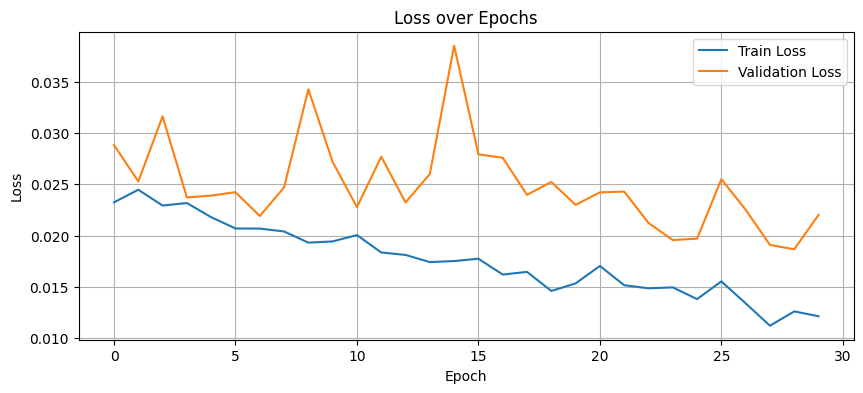

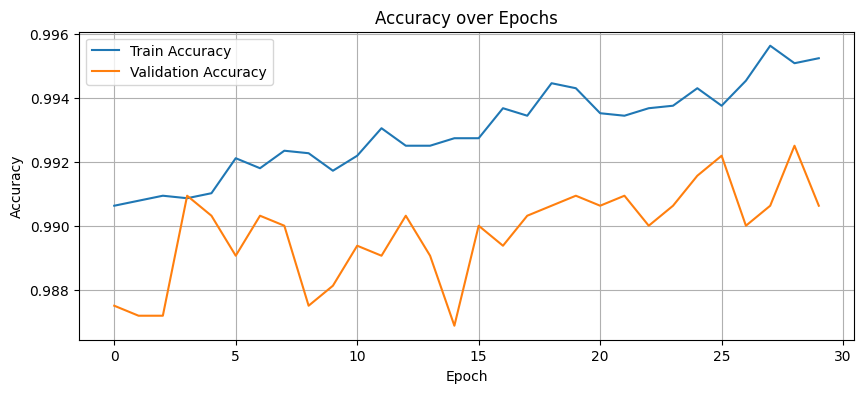

In [21]:
# (response to exercise 4)

# Train model
history = cnn_model.fit(
    [X_train_hist, X_train_sum], y_train,
    validation_data=([X_val_hist, X_val_sum], y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

The training results show that the model reaches high accuracy on both the training and validation sets, which means it is learning to correctly identify whether the network is saturated or not. However, the validation loss goes up and down during training, even though the accuracy stays high. This could mean that the model is making mostly correct predictions, but it is not always confident or consistent in how it does so. Overall, the model performs well, but the changes in validation loss suggest there might be some overfitting or that the validation data is a bit noisy.









### Exercise 5:

Select and define the most appropriate evaluation metric(s). Discuss the appropriateness of your evaluation metrics for the binary classification problem we are considering.

We believe the most appropriate evaluation metrics are accuracy, precision, recall, and F1-score.

Accuracy tells us the overall percentage of correct predictions and is useful when classes are balanced.

Precision measures how many of the predicted “saturated” cases were actually correct. This is important when false positives (wrongly detecting congestion) are costly.

Recall tells us how many of the actual “saturated” cases the model correctly identified. This is important when false negatives (missing actual congestion) are risky.

F1-score combines precision and recall into a single value, which is helpful when we want a balance between both.

Since the dataset may not be perfectly balanced, relying only on accuracy could be misleading. Including precision, recall, and F1-score gives a clearer and more complete picture of how well the model performs, especially in cases where one class is more important or more frequent than the other. These metrics help ensure that the model not only makes correct predictions overall, but also performs well in detecting both congested and uncongested states.

### Exercise 6:

Evaluate your trained model on the test set, using the evaluation metrics that you have proposed. Remember that the test data should have not been seen by the model, so that we can properly estimate of its generalization capabilities.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# === Step 1: Extract features and label from the test set ===
X_test = df_test.iloc[:, :52].copy()
X_test[52] = df_test.iloc[:, 52]  # s
X_test[53] = df_test.iloc[:, 53]  # r
X_test.columns = X_test.columns.astype(str)

y_test = df_test.iloc[:, 54].values  # as array for sklearn

# === Step 2: Normalize using the scaler from training ===
X_test_scaled = scaler.transform(X_test)

# === Step 3: Preprocess for CNN (histogram and summary inputs) ===
X_test_hist, X_test_sum = preprocess_data(X_test_scaled)

# === Step 4: Predict using trained model ===
y_pred_probs = cnn_model.predict([X_test_hist, X_test_sum])
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# === Step 5: Evaluate ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Final Evaluation on Unseen Test Set ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Saturated", "Saturated"]))



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
=== Final Evaluation on Unseen Test Set ===
Accuracy:  0.9935
Precision: 0.9935
Recall:    0.9935
F1 Score:  0.9935

Classification Report:
               precision    recall  f1-score   support

Not Saturated       0.99      0.99      0.99      2000
    Saturated       0.99      0.99      0.99      2000

     accuracy                           0.99      4000
    macro avg       0.99      0.99      0.99      4000
 weighted avg       0.99      0.99      0.99      4000



The final evaluation of the model on the unseen test set shows excellent performance across all key metrics. Accuracy, precision, recall, and F1 score all reach 0.9935, indicating that the model is making highly reliable predictions. The classification report confirms strong performance across both classes (“Saturated” and “Not Saturated”), with a perfectly balanced support of 2000 samples each. These consistent results suggest that the model has learned to identify network congestion states with very few errors and no clear bias toward either class. However, the unusually high and uniform scores, along with extremely confident predictions (e.g., probabilities of 0.0000 or 1.0000), may indicate that the model is overfitting slightly or that the dataset contains patterns that are too easily distinguishable.